По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

* **выборка:** 100 работников, 67 отметили существенный стресс; можно представить как массив 0 и 1
* **гипотеза:** $H_0$ уровень стресса ресторанной сети не отличается от среднего 75% работников по отрасли
* **статистика $T$:** доля работников с существенным стрессом; можно представить как среднее по 1

$H_1$ уровень стресса ниже среднего

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np
from scipy import stats
n = 100
F_H0 = stats.binom(n, 0.75)

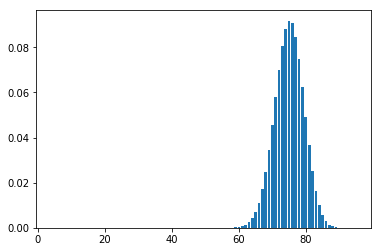

In [4]:
x = np.linspace(0,99,100)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(-0.5, 99.5) 
pylab.show()

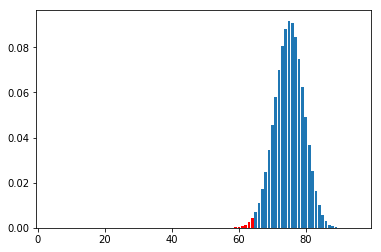

In [5]:
pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(0,64,65), F_H0.pmf(np.linspace(0,64,65)), align = 'center', color='red')
xlim(-0.5, 99.5) 
pylab.show()

In [138]:
stats.binom_test(67, 100, 0.75, alternative = 'two-sided')

0.082222588913866079

In [7]:
22./50

0.44

In [8]:
stats.binom_test(22, 50, 0.75, alternative = 'less')

2.9168262414030864e-06

The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).
pines.txt

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.


In [9]:
!head pines.txt

In [10]:
import pandas as pd
data = pd.read_csv("pines.txt", sep="\t")
data.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [11]:
data.shape

(584, 2)

In [31]:
xx = range(40,201,40)
yy = range(40,201,40)
len([(x, y) for x in xx for y in yy])

25

In [43]:
import scipy
x = [0,1,2,1,2]
y = [0,1,2,0,3]
#scipy.stats.binned_statistic_2d(x,y, [1,2,3], bins=2, 'counts')
np.histogram2d(x,y,(3,3))

(array([[ 1.,  0.,  0.],
        [ 1.,  1.,  0.],
        [ 0.,  0.,  2.]]),
 array([ 0.        ,  0.66666667,  1.33333333,  2.        ]),
 array([ 0.,  1.,  2.,  3.]))

In [49]:
scipy.stats.binned_statistic_2d(x,y, values=None, statistic='count', bins=(3,3))

BinnedStatistic2dResult(statistic=array([[ 1.,  0.,  0.],
       [ 1.,  1.,  0.],
       [ 0.,  0.,  2.]]), x_edge=array([ 0.        ,  0.66666667,  1.33333333,  2.        ]), y_edge=array([ 0.,  1.,  2.,  3.]), binnumber=array([ 6, 12, 18, 11, 18]))

In [50]:
x=data.sn
y=data.we

In [56]:
res = scipy.stats.binned_statistic_2d(x,y, values=None, statistic='count', bins=(5,5))

In [55]:
data.shape[0]

584

In [58]:
sum(res.statistic)

584.0

In [110]:
# average into each square
avg = data.shape[0]/(5.0*5.0)
avg

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

* **выборка** - целочисленный вектор длиы $n$, характеризующий количество деревьев в квадрате
* **гипотеза $H_0$** - рассматриваемая величина имеет равномерное распределение

In [66]:
res.statistic

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

In [101]:
tree_cell_count = np.array([int(x) for x in np.reshape(res.statistic, -1)]) # to 1-dimension
#tree_cell_count = [int(x) for x in np.reshape(res.statistic, -1)]
tree_cell_count


array([18, 26, 29, 25, 20, 14, 12, 22, 34, 25, 12, 24, 15, 50, 37,  8, 19,
       31, 50,  7,  7,  8, 37, 27, 27])

In [103]:
np.bincount(tree_cell_count)

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2])

<BarContainer object of 25 artists>

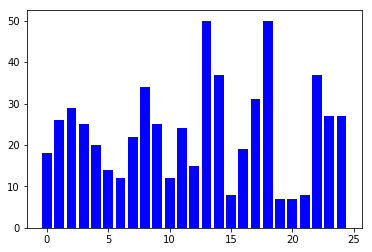

In [108]:
pylab.bar(range(len(tree_cell_count)), tree_cell_count, color = 'b', label = 'trees in square')

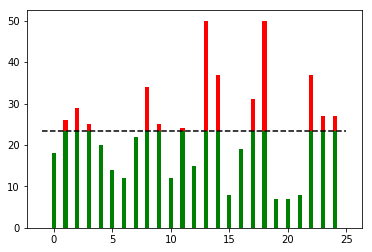

In [114]:
threshold = avg
above_threshold = np.maximum(tree_cell_count - threshold, 0)
below_threshold = np.minimum(tree_cell_count, threshold)

x = range(len(tree_cell_count))

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([-1, 25], [threshold, threshold], "k--")


In [116]:
tree_avg_count = [avg for _ in range(len(tree_cell_count))]
tree_avg_count

[23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36,
 23.36]

In [117]:
stats.chisquare(tree_cell_count, tree_avg_count, ddof = 1)

Power_divergenceResult(statistic=150.58904109589042, pvalue=9.8780617882088893e-21)

In [121]:
stats.chisquare(tree_cell_count, ddof=24)

Power_divergenceResult(statistic=150.58904109589042, pvalue=nan)

In [120]:
tree_cell_count

array([18, 26, 29, 25, 20, 14, 12, 22, 34, 25, 12, 24, 15, 50, 37,  8, 19,
       31, 50,  7,  7,  8, 37, 27, 27])

In [125]:
a = [16, 18, 16, 14, 12, 12]
a_avg = sum(a)*1./len(a)
a_avg

14.666666666666666

In [135]:
expected = a_avg
sum([((abs(x-expected)**2)/expected)  for x in a])

2.0

In [136]:
stats.chisquare(a)

Power_divergenceResult(statistic=2.0, pvalue=0.84914503608460956)

Then in that "cell" of the table, we have

    ( observed − expected )**2 / expected 

The sum of these quantities over all of the cells is the test **statistic**.